In [2]:

!pip install extra_keras_datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# 🚩 Step:1-1
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras as keras
import extra_keras_datasets.emnist as emnist

from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization, Dropout

%matplotlib inline

In [4]:

def show_version(pkg):
    print("{0:20}: {1}".format(pkg.__name__, pkg.__version__))


# 🚩 Step:1-2
show_version(np)
show_version(matplotlib)
show_version(tf)
show_version(keras)

numpy               : 1.21.6
matplotlib          : 3.2.2
tensorflow          : 2.9.2
tensorflow.keras    : 2.9.0


In [5]:
# 🚩 Step:1-3

(t_images, t_labels), (v_images, v_labels) = emnist.load_data(type="letters")

743900280/743900280 [==============================] - 12s 0us/step


t_images    : uint8, (124800, 28, 28)
t_labels    : uint8, (124800,)
v_images    : uint8, (20800, 28, 28)
v_labels    : uint8, (20800,)


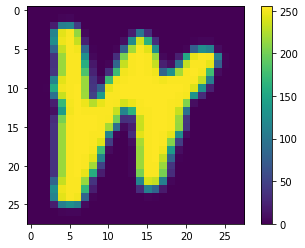

In [6]:

def show_data_info(label, data):
    print("{:12}: {}, {}".format(label, data.dtype, data.shape))


def compatible_image(img):
    if img.ndim == 3 and img.shape[2] == 1:
        img = img.reshape(img.shape[0], img.shape[1])
    return img


def show_image(img):
    plt.rcParams["font.size"] = 10
    plt.figure()
    plt.imshow(compatible_image(img))
    plt.colorbar()
    plt.grid(False)
    plt.show()


# 🚩 Step:1-4
show_data_info("t_images", t_images)
show_data_info("t_labels", t_labels)
show_data_info("v_images", v_images)
show_data_info("v_labels", v_labels)

show_image(t_images[0])

In [7]:

def adjust_image(img):
    img = img.astype("float32")
    img = img / 255.0
    img = img.reshape(-1, 28, 28, 1)  # 3D→4D
    return img


# 🚩 Step:1-5
t_images = adjust_image(t_images)
v_images = adjust_image(v_images)

t_images    : float32, (124800, 28, 28, 1)
v_images    : float32, (20800, 28, 28, 1)


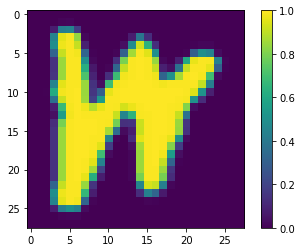

In [8]:
show_data_info("t_images", t_images)
show_data_info("v_images", v_images)
show_image(t_images[0])

In [9]:
# 🚩 Step:1-6

model = keras.Sequential(
    [
        Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=(28, 28, 1)),
        Conv2D(32, (3, 3), activation="relu", padding="same"),
        Conv2D(32, (5, 5), activation="relu", padding="same"),
        MaxPooling2D((2, 2), padding="same"),
        Dropout(0.4),
        Conv2D(64, (3, 3), activation="relu", padding="same"),
        Conv2D(64, (3, 3), activation="relu", padding="same"),
        Conv2D(64, (5, 5), activation="relu", padding="same"),
        MaxPooling2D((2, 2), padding="same"),
        Dropout(0.4),
        Flatten(),
        Dense(128, activation="relu"),
        Dropout(0.4),
        Dense(27, activation="softmax"),
    ]
)

# 🚩 Step:1-7

opt = keras.optimizers.Adam()
loss = keras.losses.SparseCategoricalCrossentropy()
model.compile(optimizer=opt, loss=loss, metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                        

In [11]:
# 🚩 Step:1-8

history = model.fit(
    t_images,
    t_labels,
    epochs=3,
    batch_size=128,
    validation_data=(v_images, v_labels),
    verbose=2,
)

Epoch 1/3
975/975 - 1575s - loss: 0.5096 - accuracy: 0.8409 - val_loss: 0.2122 - val_accuracy: 0.9283 - 1575s/epoch - 2s/step
Epoch 2/3
975/975 - 1553s - loss: 0.2803 - accuracy: 0.9112 - val_loss: 0.1846 - val_accuracy: 0.9395 - 1553s/epoch - 2s/step
Epoch 3/3
975/975 - 1554s - loss: 0.2404 - accuracy: 0.9231 - val_loss: 0.1783 - val_accuracy: 0.9378 - 1554s/epoch - 2s/step


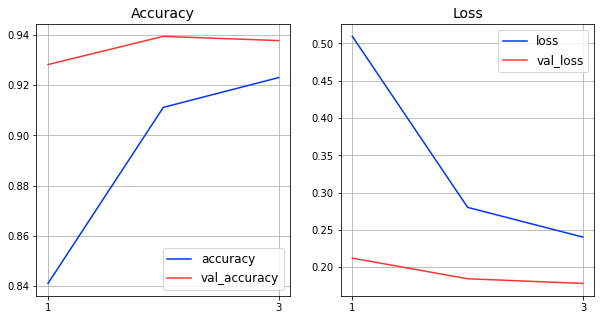

In [12]:

def show_history(history):
    plt.rcParams["font.size"] = 10
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    t_col = "#03F"
    v_col = "#F33"

    ax[0].set_title("Accuracy", fontsize=14)
    ax[0].plot(history.history["accuracy"], color=t_col, label="accuracy")
    ax[0].plot(history.history["val_accuracy"], color=v_col, label="val_accuracy")
    ax[1].set_title("Loss", fontsize=14)
    ax[1].plot(history.history["loss"], color=t_col, label="loss")
    ax[1].plot(history.history["val_loss"], color=v_col, label="val_loss")

    x_pos = np.arange(0, len(history.epoch), 2)
    for x in ax:
        x.set_xticks(x_pos)
        x.set_xticklabels(x_pos + 1)
        x.grid(True)
        x.legend(fontsize=12)

    plt.show()


# 🚩 Step:1-9
show_history(history)

In [23]:
# 🚩 Step:1-10

model.save("emnist-model.h5")

In [26]:
#Install tensorflowjs package
!pip install tensorflowjs 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 83 kB 1.6 MB/s 
     |████████████████████████████████| 578.0 MB 7.5 kB/s 
     |████████████████████████████████| 40 kB 6.0 MB/s 
     |████████████████████████████████| 185 kB 60.9 MB/s 
     |████████████████████████████████| 16.0 MB 35.4 MB/s 
     |████████████████████████████████| 237 kB 61.9 MB/s 
     |████████████████████████████████| 145 kB 49.0 MB/s 
     |████████████████████████████████| 51 kB 6.6 MB/s 
     |████████████████████████████████| 1.7 MB 52.7 MB/s 
     |████████████████████████████████| 438 kB 48.9 MB/s 
     |████████████████████████████████| 5.9 MB 957 kB/s 
     |████████████████████████████████| 85 kB 4.2 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  At

In [27]:
# Convert the model
!mkdir model
!tensorflowjs_converter --input_format keras emnist-model.h5 model/

mkdir: cannot create directory ‘model’: File exists
2022-11-14 02:51:44.494302: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-14 02:51:45.585491: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2022-11-14 02:51:45.585719: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2022-11-14 02:51:45.585749: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would 

In [28]:
!zip -r model.zip model

  adding: model/ (stored 0%)
  adding: model/model.json (deflated 86%)
  adding: model/group1-shard1of1.bin (deflated 7%)


In [29]:
from google.colab import files
files.download('model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>